# Custom Vision API を使った物体検出の例

このノートブックでは、Cognitive Services の Custom Vision API を使って物体検知を行います。

Custom Vision APIでは、顧客データなど独自のデータを使って学習モデルを生成できます。

https://www.customvision.ai/

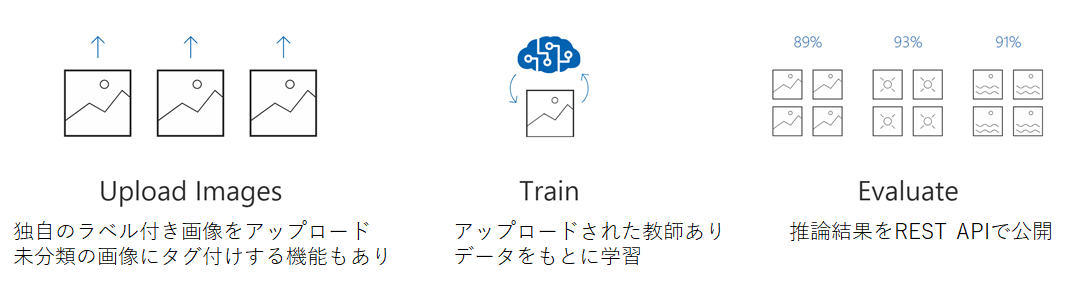

<hr>

## 1. 準備

サンプルコードを取得し、Cognitive ServiceのPython SDKをインストールします

In [1]:
!git clone https://github.com/Azure-Samples/cognitive-services-python-sdk-samples.git

fatal: destination path 'cognitive-services-python-sdk-samples' already exists and is not an empty directory.


In [2]:
!pip install azure-cognitiveservices-vision-customvision

## 2. トレーニング キーと予測キーを取得する
このサンプルで使用されるキーを取得するには、[Custom Vision サイト](https://www.customvision.ai/)にアクセスし、右上にある__歯車アイコン__を選択します。 ［アカウント］セクションで、Training KeyフィールドとPrediction Keyフィールドから値をコピーします。

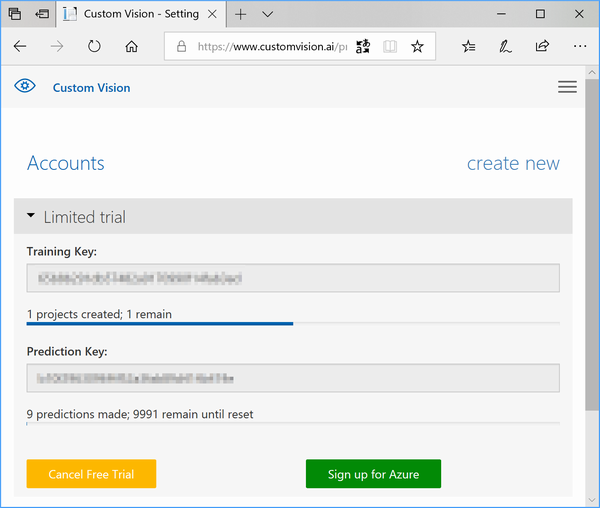


In [9]:
training_key = "xxxxx"
prediction_key = "xxxxx"

## 3.  Custom Vision Service プロジェクトの作成
新しい Custom Vision Service プロジェクトを作成します。

物体検出と画像分類のプロジェクト作成の違いは create_project 呼び出しに指定されるドメインです。

In [4]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region

trainer = training_api.TrainingApi(training_key)
obj_detection_domain = next(domain for domain in trainer.get_domains() if domain.type == "ObjectDetection")

print ("Creating project...")
project = trainer.create_project("Detection Project", domain_id=obj_detection_domain.id)

Creating project...


## 4. タグをプロジェクトに追加する
タグをプロジェクトに追加するには、2 つのタグを作成し、学習に利用する画像を指定します。

今回のサンプルでは、cognitive-services-python-sdk-samples/samples/vision/images/にあるフォークとナイフのjpeg画像をそれぞれ20枚ずつ使用します。

In [5]:
fork_tag = trainer.create_tag(project.id, "fork")
scissors_tag = trainer.create_tag(project.id, "scissors")

fork_image_regions = {
    "fork_1": [ 0.145833328, 0.3509314, 0.5894608, 0.238562092 ],
    "fork_2": [ 0.294117659, 0.216944471, 0.534313738, 0.5980392 ],
    "fork_3": [ 0.09191177, 0.0682516545, 0.757352948, 0.6143791 ],
    "fork_4": [ 0.254901975, 0.185898721, 0.5232843, 0.594771266 ],
    "fork_5": [ 0.2365196, 0.128709182, 0.5845588, 0.71405226 ],
    "fork_6": [ 0.115196079, 0.133611143, 0.676470637, 0.6993464 ],
    "fork_7": [ 0.164215669, 0.31008172, 0.767156839, 0.410130739 ],
    "fork_8": [ 0.118872553, 0.318251669, 0.817401946, 0.225490168 ],
    "fork_9": [ 0.18259804, 0.2136765, 0.6335784, 0.643790841 ],
    "fork_10": [ 0.05269608, 0.282303959, 0.8088235, 0.452614367 ],
    "fork_11": [ 0.05759804, 0.0894935, 0.9007353, 0.3251634 ],
    "fork_12": [ 0.3345588, 0.07315363, 0.375, 0.9150327 ],
    "fork_13": [ 0.269607842, 0.194068655, 0.4093137, 0.6732026 ],
    "fork_14": [ 0.143382356, 0.218578458, 0.7977941, 0.295751631 ],
    "fork_15": [ 0.19240196, 0.0633497, 0.5710784, 0.8398692 ],
    "fork_16": [ 0.140931368, 0.480016381, 0.6838235, 0.240196079 ],
    "fork_17": [ 0.305147052, 0.2512582, 0.4791667, 0.5408496 ],
    "fork_18": [ 0.234068632, 0.445702642, 0.6127451, 0.344771236 ],
    "fork_19": [ 0.219362751, 0.141781077, 0.5919118, 0.6683006 ],
    "fork_20": [ 0.180147052, 0.239820287, 0.6887255, 0.235294119 ]
}

scissors_image_regions = {
    "scissors_1": [ 0.4007353, 0.194068655, 0.259803921, 0.6617647 ],
    "scissors_2": [ 0.426470578, 0.185898721, 0.172794119, 0.5539216 ],
    "scissors_3": [ 0.289215684, 0.259428144, 0.403186262, 0.421568632 ],
    "scissors_4": [ 0.343137264, 0.105833367, 0.332107842, 0.8055556 ],
    "scissors_5": [ 0.3125, 0.09766343, 0.435049027, 0.71405226 ],
    "scissors_6": [ 0.379901975, 0.24308826, 0.32107842, 0.5718954 ],
    "scissors_7": [ 0.341911763, 0.20714055, 0.3137255, 0.6356209 ],
    "scissors_8": [ 0.231617644, 0.08459154, 0.504901946, 0.8480392 ],
    "scissors_9": [ 0.170343131, 0.332957536, 0.767156839, 0.403594762 ],
    "scissors_10": [ 0.204656869, 0.120539248, 0.5245098, 0.743464053 ],
    "scissors_11": [ 0.05514706, 0.159754932, 0.799019635, 0.730392158 ],
    "scissors_12": [ 0.265931368, 0.169558853, 0.5061275, 0.606209159 ],
    "scissors_13": [ 0.241421565, 0.184264734, 0.448529422, 0.6830065 ],
    "scissors_14": [ 0.05759804, 0.05027781, 0.75, 0.882352948 ],
    "scissors_15": [ 0.191176474, 0.169558853, 0.6936275, 0.6748366 ],
    "scissors_16": [ 0.1004902, 0.279036, 0.6911765, 0.477124184 ],
    "scissors_17": [ 0.2720588, 0.131977156, 0.4987745, 0.6911765 ],
    "scissors_18": [ 0.180147052, 0.112369314, 0.6262255, 0.6666667 ],
    "scissors_19": [ 0.333333343, 0.0274019931, 0.443627447, 0.852941155 ],
    "scissors_20": [ 0.158088237, 0.04047389, 0.6691176, 0.843137264 ]
}

# 学習データを
print ("Adding images...")
tagged_images_with_regions = []

for file_name in fork_image_regions.keys():
    x,y,w,h = fork_image_regions[file_name]
    regions = [ Region(tag_id=fork_tag.id, left=x,top=y,width=w,height=h) ]

    with open("cognitive-services-python-sdk-samples/samples/vision/images/fork/" + file_name + ".jpg", mode="rb") as image_contents:
        tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))

for file_name in scissors_image_regions.keys():
    x,y,w,h = scissors_image_regions[file_name]
    regions = [ Region(tag_id=scissors_tag.id, left=x,top=y,width=w,height=h) ]

    with open("cognitive-services-python-sdk-samples/samples/vision/images/scissors/" + file_name + ".jpg", mode="rb") as image_contents:
        tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))


trainer.create_images_from_files(project.id, images=tagged_images_with_regions)

Adding images...


Webブラウザで確認するとトレーニング用のデータがアップロードされているのが分かります。

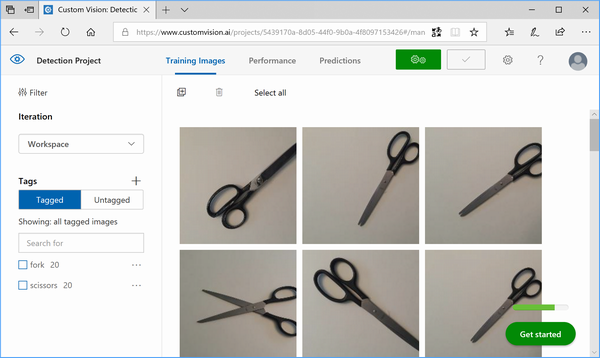

## 6. モデルを学習する
設定したタグと画像をもとに、学習します。

実行すると、プロジェクトの最初のイテレーションが作成されます。

In [6]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(2)

# 学習の実行
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed

## 7. 推論を行う
学習済みモデルを使って推論を行います。

今回のサンプルでは、以下の画像をエンドポイントに対して送信し、物体検知を行います。

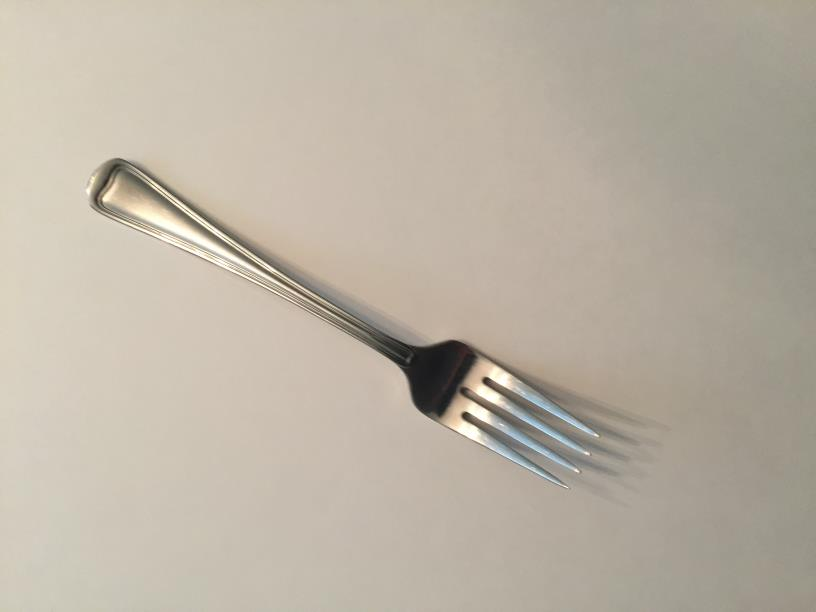

In [7]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('cognitive-services-python-sdk-samples/samples/vision/images/Test/test_od_image.jpg'))

prediction_endpoint.PredictionEndpointで推論のためのエンドポイントが取得できるので、ここにサンプル画像を送信して推論結果を受けとります。

In [8]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

    
# エンドポイントの取得
predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

# エンドポイントの呼び出し
with open("cognitive-services-python-sdk-samples/samples/vision/images/Test/test_od_image.jpg", mode="rb") as test_data:
    results = predictor.predict_image(project.id, test_data, iteration.id)

# 推論結果の表示
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100), prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height)


	fork: 98.19% 0.111609578 0.184719115 0.6607002 0.6637112
	scissors: 1.24% 0.112389535 0.119195729 0.658031344 0.7023591


<hr>
詳細については：

https://docs.microsoft.com/ja-jp/azure/cognitive-services/custom-vision-service/python-tutorial-od